# Calories Burnt On Workout

Dataset link:https://www.kaggle.com/fmendes/fmendesdat263xdemos?select=exercise.csv

In this project, I applied different Machine Learning models to predict the data of calories burned in the exercises from the knowledge of duration (t), heart rate (h), body temperature (T), age (A), weight (W), height (H) and gender (G). It was verified that the variable that most influences the burning of calories is duration, followed by heart rate and body temperature.

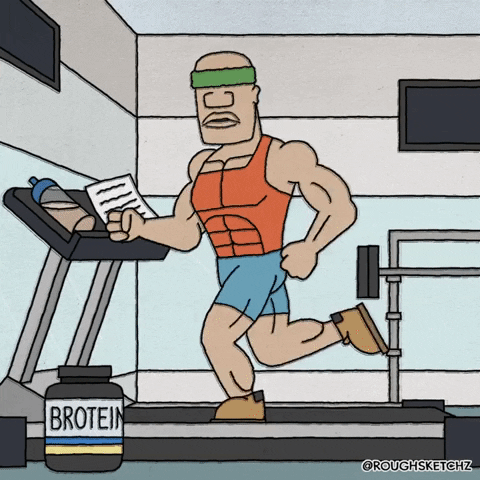

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading datasets

In [2]:
calories = pd.read_csv('calories.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35


In [4]:
exercise = pd.read_csv('exercise.csv')

In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


## Merging the two dataframes

In [6]:
data = pd.merge(exercise,calories,on = 'User_ID')

In [7]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


## EDA

In [8]:
data.shape

(15000, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.1+ MB


In [10]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
cat_columns =data.columns[(data.dtypes =='object').values].tolist()
cat_columns

['Gender']

In [12]:
data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [13]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Data Visualization

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

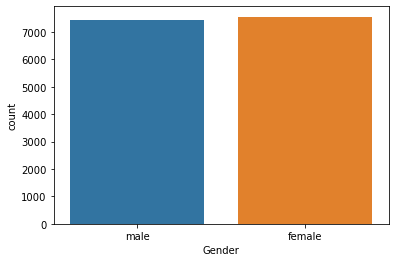

In [14]:
# plotting the gender column in count plot
sns.countplot(data['Gender'])

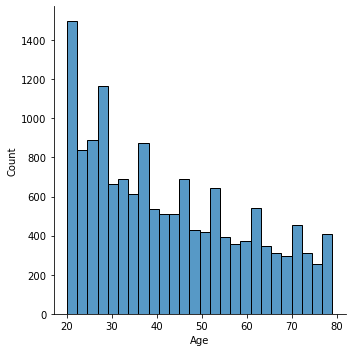

In [15]:
# finding the distribution of "Age" column
sns.displot(data['Age'])

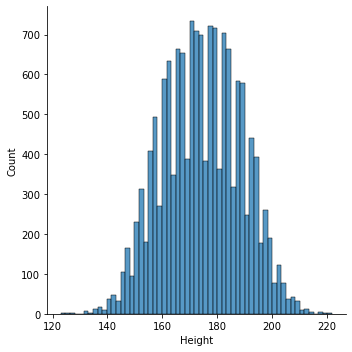

In [16]:
# finding the distribution of "Height" column
sns.displot(data['Height'])

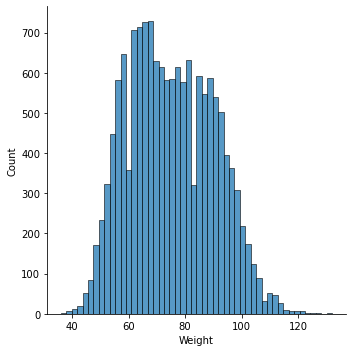

In [17]:
# finding the distribution of "Weight" column
sns.displot(data['Weight'])

In [18]:
correlation=data.corr()

<AxesSubplot:>

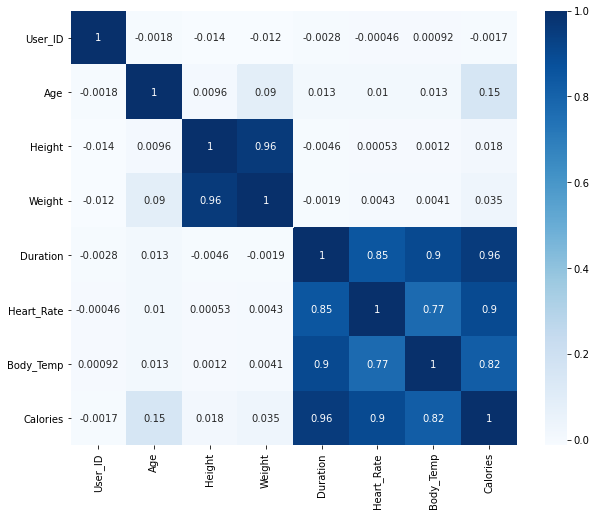

In [19]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='Blues')

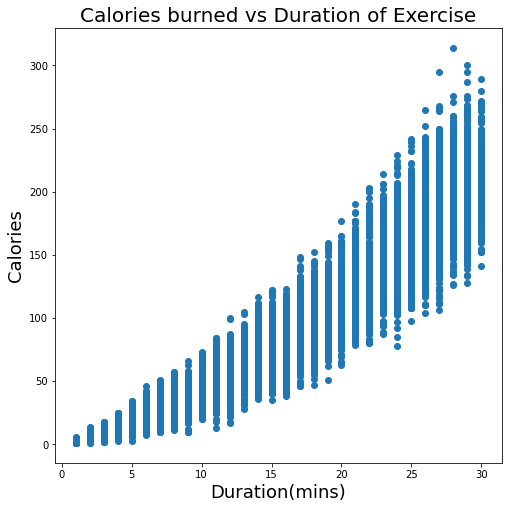

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(data['Duration'],data['Calories'])
plt.xlabel('Duration(mins)', size = 18)
plt.ylabel('Calories', size = 18)
plt.title('Calories burned vs Duration of Exercise', size = 20)
plt.show()

## Encoding Categorical data

In [21]:
## Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
data=pd.get_dummies(data,drop_first=True)
data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,14733363,68,190,94,29,105,40.8,231,1
1,14861698,20,166,60,14,94,40.3,66,0
2,11179863,69,179,79,5,88,38.7,26,1
3,16180408,34,179,71,13,100,40.5,71,0
4,17771927,27,154,58,10,81,39.8,35,0


## Splitting the data

In [22]:
X = data.drop(columns=['User_ID','Calories'], axis=1)
Y = data['Calories']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Model Evaluation


## XGBOOST Model

In [26]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
prediction = model.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error

In [29]:
r2_score(Y_test,prediction)

0.9988455802289196

In [30]:
mean_absolute_error(Y_test,prediction)

1.480544296960036

## Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
prediction = model.predict(X_test)

In [33]:
r2_score(Y_test,prediction)

0.9668790377181355

In [34]:
mean_absolute_error(Y_test,prediction)

8.385188053147207

## DecisionTree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
prediction=model.predict(X_test)

In [37]:
r2_score(Y_test,prediction)

0.9903692697354084

In [38]:
mean_absolute_error(Y_test,prediction)

3.9146666666666667

## Random Forest model

In [39]:
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(X_train, Y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
prediction=model.predict(X_test)

In [41]:
r2_score(Y_test,prediction)

0.9648772585123047

In [42]:
mean_absolute_error(Y_test,prediction)

6.93

# Conclusion

## r2_scores:

    XGBOOST Model:99%
    Linear Regression Model: 96%
    Decision Tree Model: 99%
    Random Forest Model: 96%
  From the above models performance we can say that every model is performing well but, Decision Tree and XGBoost models
  are giving higher score compared to other models. So, we can use Decision Tree or XGBoost Model for predictions.